### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
from pandas.api.types import is_numeric_dtype

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

Identifying unique values in each column

In [7]:
# Indentifying unique value each column
for column in data:
    print(column + " = "+ str(data[column].unique()) + "\n")

destination = ['No Urgent Place' 'Home' 'Work']

passanger = ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather = ['Sunny' 'Rainy' 'Snowy']

temperature = [55 80 30]

time = ['2PM' '10AM' '6PM' '7AM' '10PM']

coupon = ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

expiration = ['1d' '2h']

gender = ['Female' 'Male']

age = ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus = ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

has_children = [1 0]

education = ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation = ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Se

In [53]:
print(data.isnull().sum())
# printing percentage of null values in each column
for column in data :
    if(data[column].isnull().sum() != 0):
        print("\nPersentage of null value in %s column :" %(column) + str(data[column].isnull().sum() / len(data[column]) * 100))
        

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Persentage of null value in car column :99.14853358561967

Persentage of null value in Bar column :0.8435824660990224

Persentage of null value in CoffeeHouse column :1.7108167770419427

Persentage of null 

3. Decide what to do about your missing data -- drop, replace, other...

By looking at the above data, they are 99% of the car data is null, so deciding to remove the column and stored it 
to data frame `c_data` ('c' referring as cleaned).

Also, there are some null values in other columns, but there are less than ~2%, so decided to keep those columns, and convert those nan value to 'no answer`

In [63]:
# Drop the car column and stored the dataframe in c_data
c_data = data.drop('car', axis=1)

In [65]:
# Replacing all nan value with 'No Answer'
c_data = c_data.fillna("No Answer")

In [66]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



Creating `uniqueValueCount` function to return the count of unique values in given column, and `uniqueValueProportion` function to return the percentage of unique values in given column. These function can be reused later when needed.

In [117]:
# This uniqueValueCount fun will return the count of unique in given column
def uniqueValueCount(column): return column.value_counts(normalize=False)
# example
print(proportionOfColumn(c_data["Bar"]))

never        5197
less1        3482
1~3          2473
4~8          1076
gt8           349
No Answer     107
Name: Bar, dtype: int64


In [122]:
def uniqueValueProportion(column): return column.value_counts(normalize=True)*100
print(uniqueValueProportion(c_data["Bar"]))

never        40.972879
less1        27.451908
1~3          19.497004
4~8           8.483128
gt8           2.751498
No Answer     0.843582
Name: Bar, dtype: float64


In [182]:
# This function takes the column and produce the bar plot for the % of coupon acceptance, this can be used later
def proportionOfCoupon(columnY):
    uniqueValueCount_Y = uniqueValueCount(columnY)
    uniqueValueProportion_Y = uniqueValueProportion(columnY)
    fig = sns.barplot(x = uniqueValueCount_Y.index, y = uniqueValueCount_Y.values, order=uniqueValueCount_Y.index)
    readable_labels = []
    # Adding labels
    for label in uniqueValueCount_Y.index:
        if label == 1:
            readable_labels.append("Yes")
        else:
            readable_labels.append("No")
    # adding percentage on top of the bar
    for index, value in enumerate(uniqueValueCount_Y.values):
        plt.text(index, value, str(round(uniqueValueProportion_Y.values[index], 2))+"%", ha='center', va='bottom')
    fig.set_xticklabels(readable_labels)

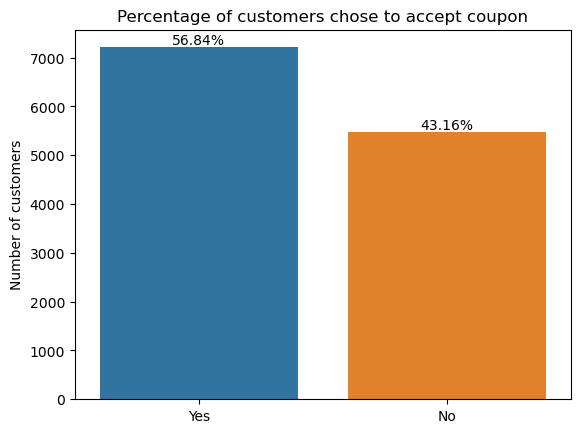

In [185]:
proportionOfCoupon(c_data["Y"])
plt.title("Percentage of customers chose to accept coupon")
plt.ylabel("Number of customers")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

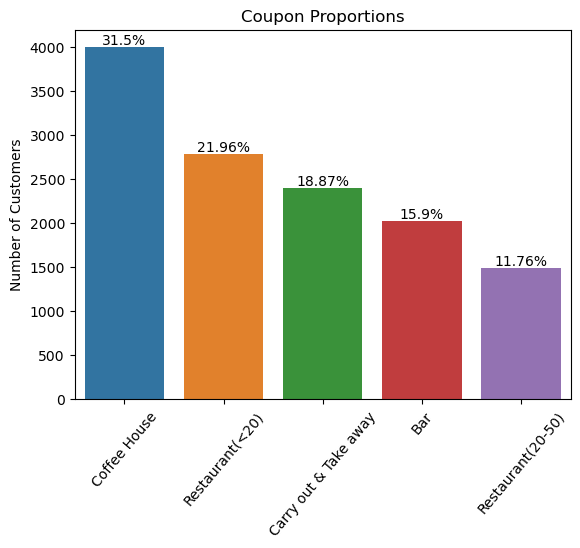

In [159]:
coupon_count = uniqueValueCount(c_data["coupon"])
coupon_proportion = uniqueValueProportion(c_data["coupon"])
fig_coupon = sns.barplot(x=coupon_count.index, y=coupon_count.values, order=coupon_count.index)
plt.title("Coupon Proportions")
plt.ylabel("Number of Customers")
# adding proportions to each bar
for index, value in enumerate(coupon_count.values):
    plt.text(index, value, str(round(coupon_proportion.values[index], 2))+"%", ha='center', va='bottom')
plt.xticks(rotation=50)
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Proportion')

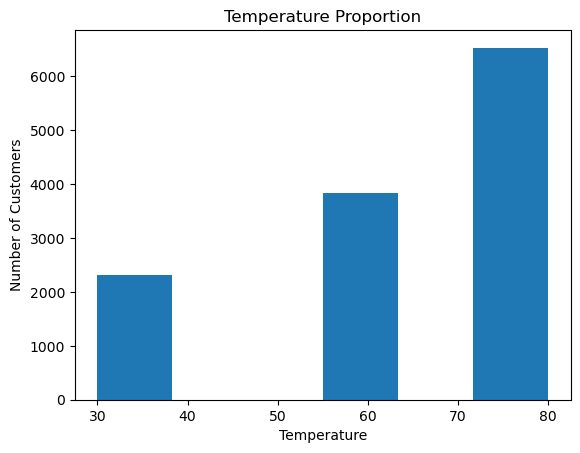

In [165]:
plt.hist(c_data['temperature'], bins = 6)
plt.xlabel('Temperature')
plt.ylabel('Number of Customers')
plt.title('Temperature Proportion')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [416]:
# Creating data frame bar_df for only Bar coupon data.
bar_df = c_data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


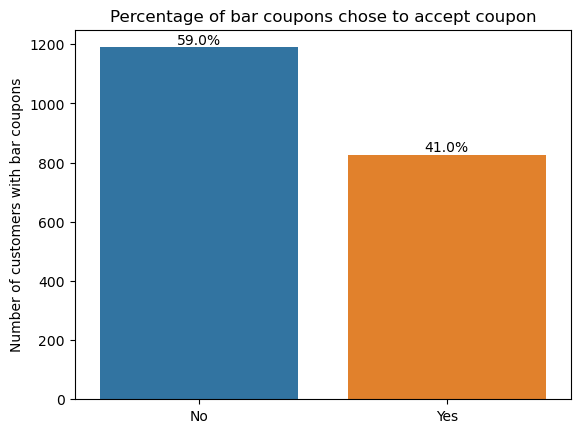

In [186]:
proportionOfCoupon(bar_df["Y"])
plt.title("Percentage of bar coupons chose to accept coupon")
plt.ylabel("Number of customers with bar coupons")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [279]:
# Removing never, and no answer from the data

df1 = bar_df[bar_df['Bar'].isin(['less1', '1~3', 'gt8', '4~8'])]
df1['Bar'].unique()

array(['less1', '1~3', 'gt8', '4~8'], dtype=object)

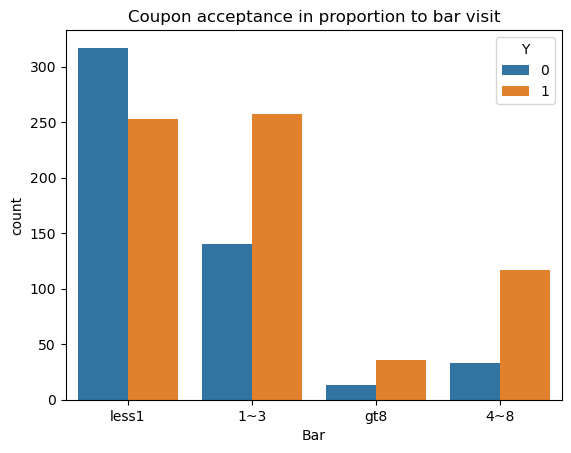

In [323]:
sns.countplot(data=df1, x='Bar', hue='Y')
plt.title("Coupon acceptance in proportion to bar visit")
value_count = df1.query("Y == 1")['Bar'].value_counts()

In [277]:
df2 = df1
df2.loc[df1['Bar'].isin(['less1','1~3']), 'Bar'] = '3_or_fewer'
df2.loc[df1['Bar'].isin(['gt8','4~8']), 'Bar'] = '4_or_more'

In [291]:
df2['Bar'].unique()

array(['3_or_fewer', '4_or_more'], dtype=object)

In [535]:
def couponAcceptPercent(df, query_expression):
    yes = df.query(query_expression+"and Y == 1")["coupon"].count()
    no = df.query(query_expression+"and Y == 0")["coupon"].count()
    return "%.2f"%((yes/(yes+no))*100)

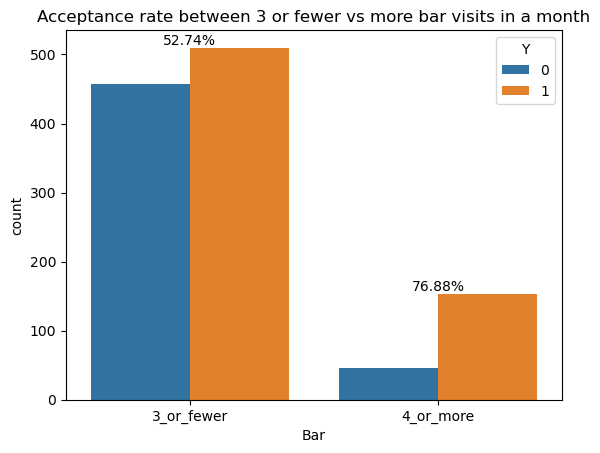

In [536]:
sns.countplot(data=df2, x='Bar', hue='Y')
plt.title("Acceptance rate between 3 or fewer vs more bar visits in a month")
value_count = df2.query("Y == 1")['Bar'].value_counts()
unique_values = df2['Bar'].unique()
for index, value in enumerate(value_count):
    plt.annotate(str(couponAcceptPercent(df2, "Bar == '{}'".format(unique_values[index]))+"%"), 
                 xy=(index, value), ha='center', va='bottom')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Transforming the data according to the age and bar visits

In [343]:
# Driver who go to bar
df4 = bar_df[bar_df['Bar'].isin(['never', 'less1', '1~3', 'gt8', '4~8'])]
# Transforming the data according to the age and bar visits by renaming apropriate
df4.loc[df4['Bar'].isin(['never','less1']), 'Bar'] = 'less_than_once'
df4.loc[df4['Bar'].isin(['1~3', 'gt8', '4~8']), 'Bar'] = 'more_than_once'
df4.loc[df4['age'].isin(['46', '26', '31', '41', '50plus', '36']), 'age'] = 'over_25'
df4.loc[df4['age'].isin(['21','below21']), 'age'] = 'below_25'

df4['age'].unique()

array(['below_25', 'over_25'], dtype=object)

In [344]:
# Createing data frame for age below 25 and above 25
df4_young = df4[df4['age'].isin(['below_25'])]
df4_old = df4[df4['age'].isin(['over_25'])]

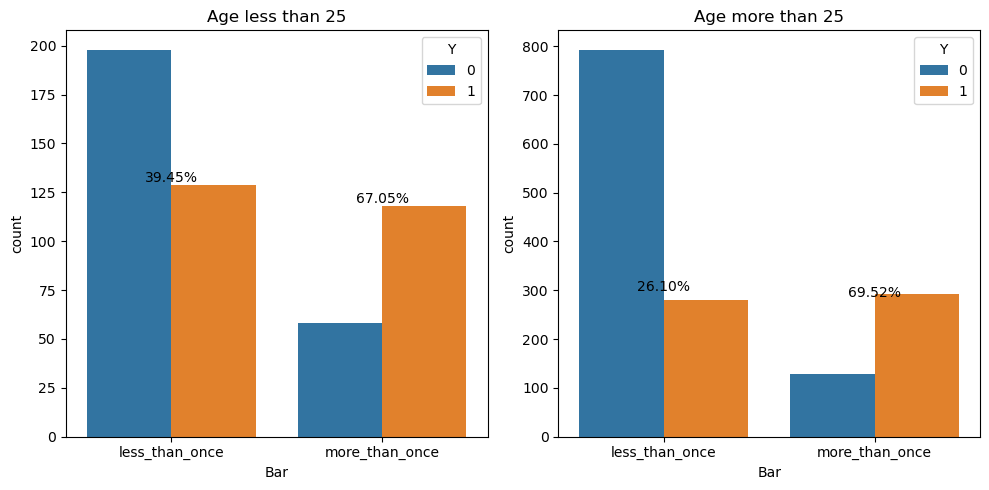

In [537]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=df4_young, x='Bar', hue='Y', ax=axes[0])
axes[0].set_title('Age less than 25')
value_count = df4_young.query("Y == 1")['Bar'].value_counts()
unique_values = df4_young['Bar'].unique()
# Adding acceptance proportion for age less than 25
for index, value in enumerate(value_count):
    axes[0].annotate(str(couponAcceptPercent(df4_young, "Bar == '{}'".format(unique_values[index]))+"%"), 
                 xy=(index, value), ha='center', va='bottom')

sns.countplot(data=df4_old, x='Bar', hue='Y', ax=axes[1])
axes[1].set_title('Age more than 25')
value_count = df4_old.query("Y == 1")['Bar'].value_counts()
unique_values = df4_old['Bar'].unique()
# Adding acceptance proportion for age more than 25
for index, value in enumerate(value_count):
    axes[1].annotate(str(couponAcceptPercent(df4_old, "Bar == '{}'".format(unique_values[index]))+"%"), 
                 xy=(index, value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [379]:
df5 = df4[(df4["passanger"] != 'Kid(s)') & (df4['occupation'] != 'Farming Fishing & Forestry')]

array(['Alone', 'Friend(s)', 'Partner'], dtype=object)

Text(0.5, 1.0, 'Acceptance rate of passengers were no kids and had occupations other than farming, fishing, or forestry.')

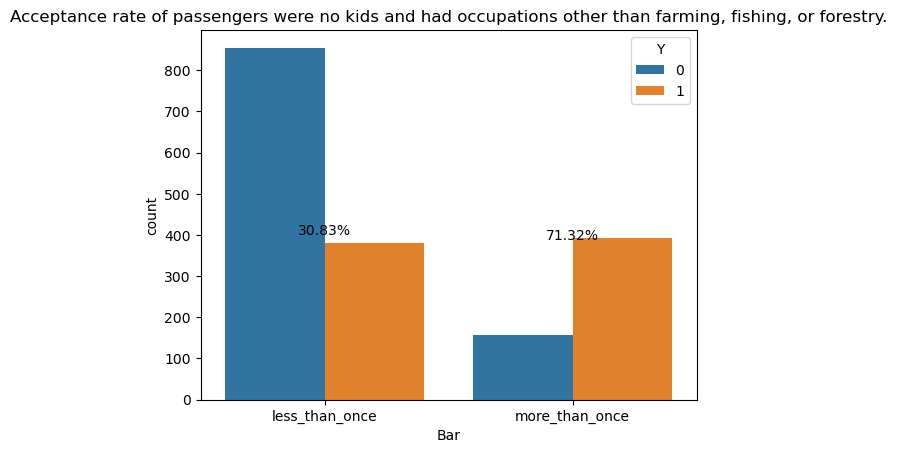

In [412]:
sns.countplot(data=df5, x='Bar', hue='Y')
value_count = df5.query("Y == 1")['Bar'].value_counts()
unique_values = df5['Bar'].unique()
for index, value in enumerate(value_count):
    plt.annotate(str(couponAcceptPercent(df5, "Bar == '{}'".format(unique_values[index]))+"%"), 
                 xy=(index, value), ha='center', va='bottom')
plt.title("Acceptance rate of passengers were no kids and had occupations other than farming, fishing, or forestry.")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [413]:
df6 = df4[(df4["Bar"] == "more_than_once") & (df4["passanger"] != 'Kid(s)') & (df4["maritalStatus"] != 'Widowed')]
df7 = bar_df
df7.loc[df7['Bar'].isin(['1~3', 'gt8', '4~8']), 'Bar'] = 'more_than_once'
df7 = df7[(df7["Bar"] == "more_than_once") & (df7["age"].isin(['21', '26', 'below21']))]

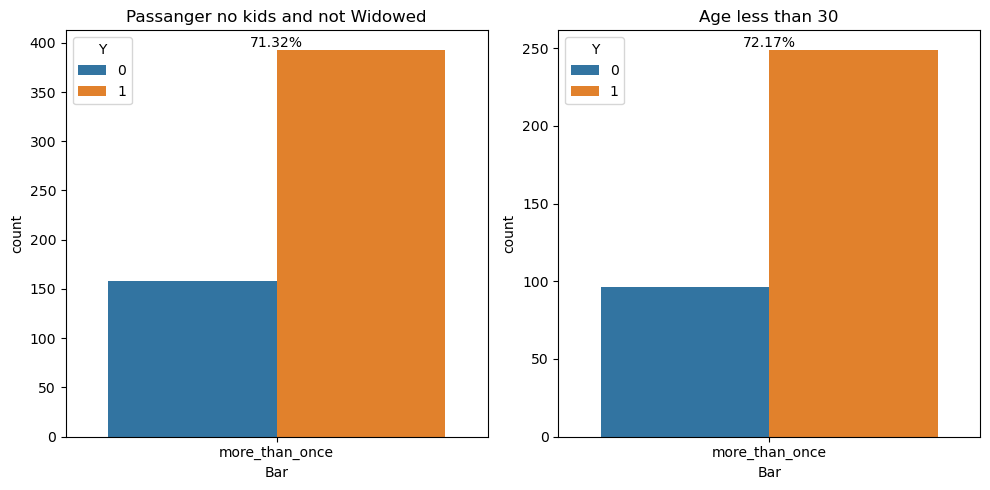

In [554]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=df6, x='Bar', hue='Y', ax=axes[0])
axes[0].set_title('Passanger no kids and not Widowed')
value_count = df6.query("Y == 1")['Bar'].value_counts()
unique_values = df6['Bar'].unique()
for index, value in enumerate(value_count):
    axes[0].annotate(str(couponAcceptPercent(df6, "Bar == '{}'".format(unique_values[index]))+"%"), 
                 xy=(index, value), ha='center', va='bottom')

sns.countplot(data=df7, x='Bar', hue='Y', ax=axes[1])
axes[1].set_title('Age less than 30')
value_count = df7.query("Y == 1")['Bar'].value_counts()
unique_values = df7['Bar'].unique()
for index, value in enumerate(value_count):
    axes[1].annotate(str(couponAcceptPercent(df7, "Bar == '{}'".format(unique_values[index]))+"%"), 
                 xy=(index, value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* After the above analyzing the bar coupon data, there are only 41% of driver accept bar coupons. In those drivers who goes to bar more often tends to accept more, which is 76.88% of drivers who goes to bar more than 3 time per month.

* In another analysis, comparing younger(less than 25) and older(more than 25) drivers, interestingly younger drivers are tends to accept 39% of coupons than older drives, comparing only 26% in oder population.

* Also, another analysis reveal that there is no effect on accepting bar coupons drives who visits bar more than once, if passengers were not a kid, or not widowed, or under 30.

* The conclusion is people who go to bar more often accepts coupon more, and variables like no kid passengers, no widowed and occupation other than farming, fishing, or forestry has not much effect on the coupon acceptance proportion.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. What is the coupon acceptance proportion of carry out & take away

In [518]:
# df only contains the carryout and take away data
df_carry_out = c_data[c_data['coupon'] == 'Carry out & Take away']
df_carry_out = df_carry_out[df_carry_out['CarryAway'].isin(['1~3','4~8','gt8','less1'])]

In [519]:
group_carryaway = df_carry_out.groupby(['CarryAway','Y'])['coupon'].size().reset_index()

Text(0, 0.5, 'Count')

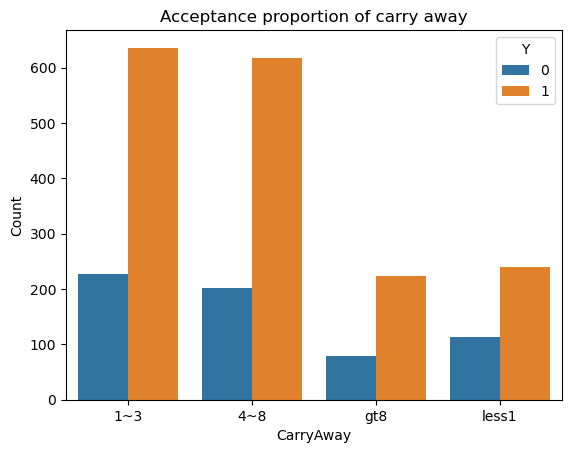

In [520]:
sns.barplot(data=group_carryaway, x='CarryAway', y='coupon', hue='Y')
plt.title("Acceptance proportion of carry away")
plt.ylabel("Count")

2. Drivers carryout coupon acceptance proportion when having kids and friends as passengers

In [551]:
# creating data frame for kids and friends as paasenger type 
df_carry_out1 = df_carry_out[(df_carry_out['passanger'] == "Kid(s)")]
df_carry_out2 = df_carry_out[(df_carry_out['passanger'] == "Friend(s)")]

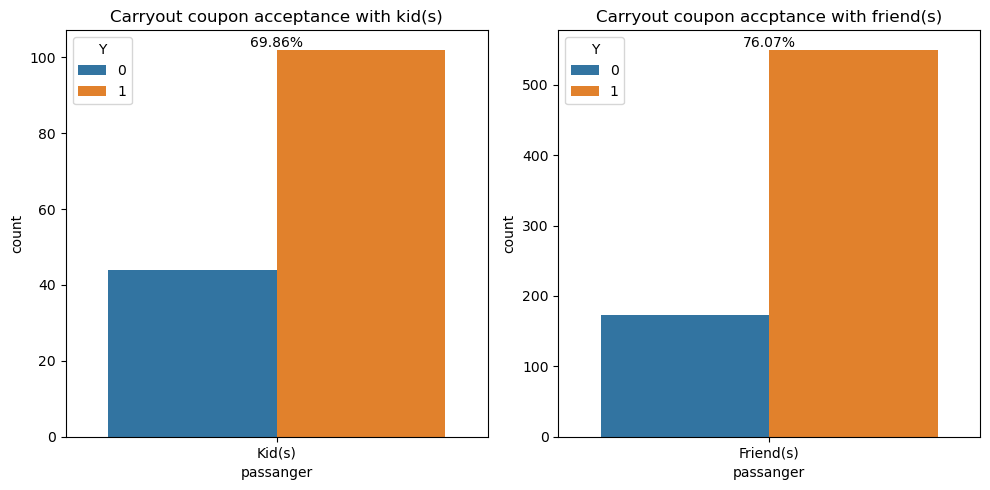

In [568]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# ploting passanger type kids proportion of carryout 
sns.countplot(data=df_carry_out1, x='passanger', hue='Y', ax=axes[0])
axes[0].set_title("Carryout coupon acceptance with kid(s)")
value_count = df_carry_out1.query("Y == 1")['coupon'].value_counts()
for index, value in enumerate(value_count):
    axes[0].annotate(str(couponAcceptPercent(df_carry_out1, "passanger == 'Kid(s)'")+"%"),
            xy=(index, value),ha='center',va='bottom')
    
# ploting passanger type friends proportion of carryout 
sns.countplot(data=df_carry_out2, x='passanger', hue='Y', ax=axes[1])
axes[1].set_title("Carryout coupon accptance with friend(s)")
value_count = df_carry_out2.query("Y == 1")['coupon'].value_counts()
for index, value in enumerate(value_count):
    axes[1].annotate(str(couponAcceptPercent(df_carry_out2, "passanger == 'Friend(s)'")+"%"),
            xy=(index, value),ha='center',va='bottom')
    
plt.tight_layout()
plt.show()

In [ ]:
3. Drivers carryout coupon acceptance proportion when having kids and friends as passengers

In [560]:
# creating data frame for alone and parter as paasengers 
df_carry_out3 = df_carry_out[(df_carry_out['passanger'] == "Alone")]
df_carry_out4 = df_carry_out[(df_carry_out['passanger'] == "Partner")]

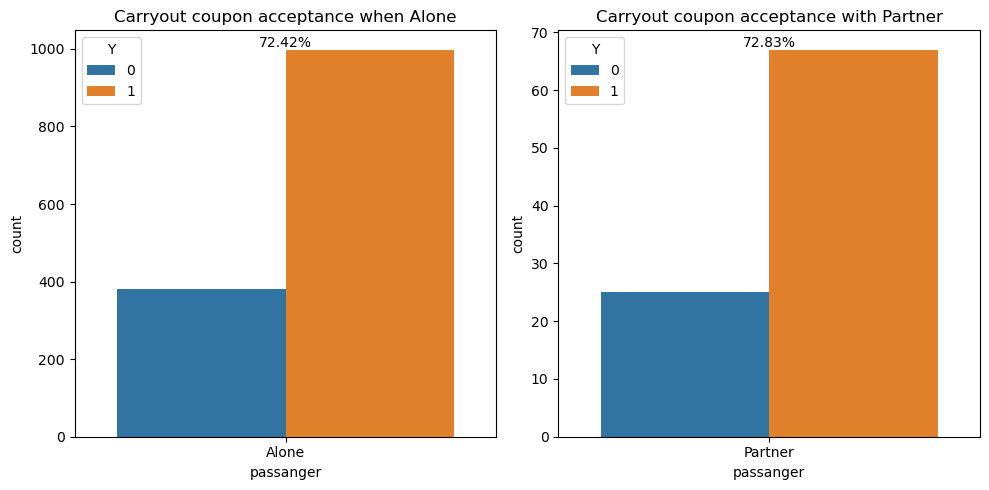

In [590]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# ploting passanger type alone proportion of carryout 
sns.countplot(data=df_carry_out3, x='passanger', hue='Y', ax=axes[0])
axes[0].set_title("Carryout coupon acceptance when Alone")
value_count = df_carry_out3.query("Y == 1")['coupon'].value_counts()
for index, value in enumerate(value_count):
    axes[0].annotate(str(couponAcceptPercent(df_carry_out3, "passanger == 'Alone'")+"%"),
            xy=(index, value),ha='center',va='bottom')
    
# ploting passanger type partner proportion of carryout 
sns.countplot(data=df_carry_out4, x='passanger', hue='Y', ax=axes[1])
axes[1].set_title("Carryout coupon acceptance with Partner")
value_count = df_carry_out4.query("Y == 1")['coupon'].value_counts()
for index, value in enumerate(value_count):
    axes[1].annotate(str(couponAcceptPercent(df_carry_out4, "passanger == 'Partner'")+"%"),
            xy=(index, value),ha='center',va='bottom')
    
plt.tight_layout()
plt.show()

4. What proportion of passengers accepting coupon between expensive and less expensive restaurant?

In [583]:
# creating data sets for ress expensive or more empensive restaurant
df_restaurant = c_data[c_data['coupon'] == 'Restaurant(<20)']
df_restaurant_exp = c_data[c_data['coupon'] == 'Restaurant(20-50)']

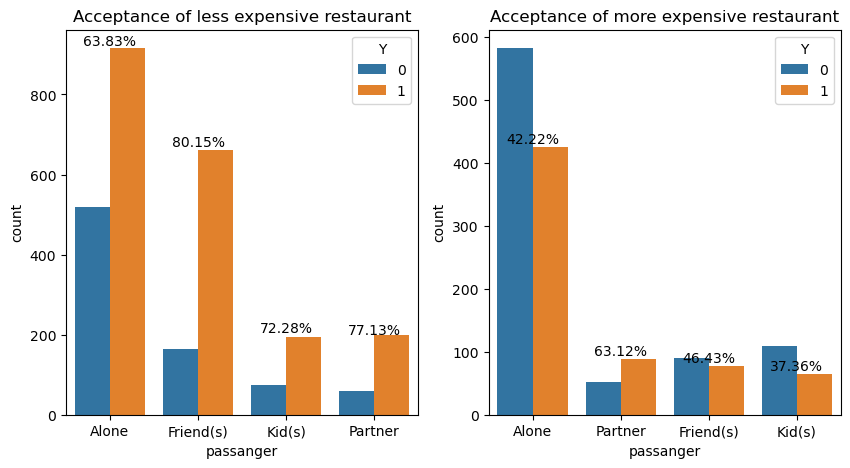

In [587]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# ploting passangers proportion of less expensive restaurant
sns.countplot(data=df_restaurant, x='passanger', hue='Y',ax=axes[0])
ax=axes[0].set_title("Acceptance of less expensive restaurant")
value_count = df_restaurant.query("Y == 1")['passanger'].value_counts()
unique_values = df_restaurant['passanger'].unique()
for index, value in enumerate(value_count):
    ax=axes[0].annotate(str(couponAcceptPercent(df_restaurant, "passanger == '{}'".format(unique_values[index]))+"%"),
            xy=(index, value),ha='center',va='bottom')
    
# ploting passangers proportion of more expensive restaurant
sns.countplot(data=df_restaurant_exp, x='passanger', hue='Y',ax=axes[1])
ax=axes[1].set_title("Acceptance of more expensive restaurant")
value_count = df_restaurant_exp.query("Y == 1")['passanger'].value_counts()
unique_values = df_restaurant_exp['passanger'].unique()
for index, value in enumerate(value_count):
    ax=axes[1].annotate(str(couponAcceptPercent(df_restaurant_exp, "passanger == '{}'".format(unique_values[index]))+"%"),
            xy=(index, value),ha='center',va='bottom')
    

#### Conclusion:
The above analysis concludes few key points about the customer accepting restaurant coupons and carryout in relation with the whom customer traveling with.

Interestingly there is no much difference in the carryout coupon acceptance proportions in relation with whom customer traveling with, although it is worth mentioning that there is slightly less proportion accepting carryout coupon when traveling with kids.

On the other hand, the proportions of the expensive and less expensive restaurants are surprising, the proportions of accepting less expensive coupons is significantly higher irrespective of whom they traveling with, thought traveling friends hight percentage accepting less expensive restaurants coupons. Whereas traveling with parter tends interest more towards more expensive restaurant.